# Altro

In [1]:
'''delta_z = z_max - z_min #uguale

delta_r = (delta_z * c) / H0 #uguale

V = (1/3) * (Omega * delta_r**3) #uguale

r_cyl = 0.5
h_cyl = 2000 / H0
cyl_vol = np.pi * (r_cyl**2) * h_cyl #uguale

n_density_mean = N / V * cyl_vol

print ('n_density_mean =', n_density_mean)

sigma_mean = n_density_mean / (np.pi * r_cyl**2)

print ('sigma_mean =', sigma_mean)'''

"delta_z = z_max - z_min #uguale\n\ndelta_r = (delta_z * c) / H0 #uguale\n\nV = (1/3) * (Omega * delta_r**3) #uguale\n\nr_cyl = 0.5\nh_cyl = 2000 / H0\ncyl_vol = np.pi * (r_cyl**2) * h_cyl #uguale\n\nn_density_mean = N / V * cyl_vol\n\nprint ('n_density_mean =', n_density_mean)\n\nsigma_mean = n_density_mean / (np.pi * r_cyl**2)\n\nprint ('sigma_mean =', sigma_mean)"

# Intro

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#from astropy.coordinates import Polygon
H_0 = 70 # km/s/Mpc
c = 3 * 10**5 # km/s

In [3]:
sdss = fits.open('SDSS_EnvCatalogue.fits')
data = sdss[1].data
header = sdss[1].header
print (header)
print (sdss[1].columns)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                  104 / width of table in bytes                        NAXIS2  =                19344 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                   18 / number of columns                              EXTNAME = 'Joined  '           / table name                                     TTYPE1  = 'OBJID   '           / label for column 1                             TFORM1  = 'K       '           / format for column 1                            TTYPE2  = 'Ra      '           / label for column 2                             TFORM2  = 'D       '           / format 

# Part 1

## Task 1

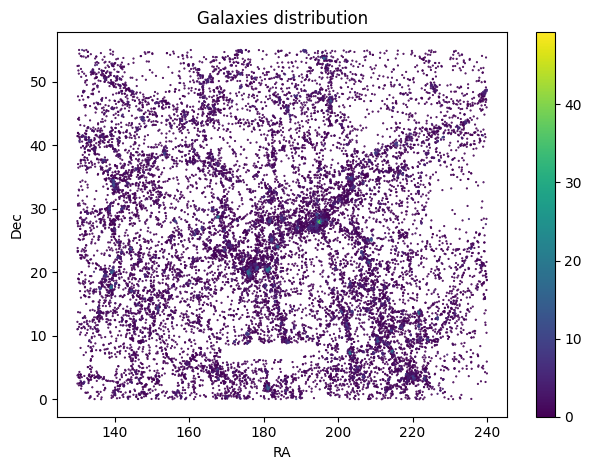

In [4]:
RA = data['RA']
Dec = data['Dec']
dens = data['dens_05']

plt.scatter (RA, Dec, s=0.3, c=dens, alpha=1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Galaxies distribution')
plt.tight_layout()
plt.colorbar()
plt.show()

In [5]:
z = data['redshift']

z_min = np.min(z)
z_max = np.max(z)

N = len(RA)

A = np.radians (min(RA))
B = np.radians (max(RA))
C = np.radians (min(Dec))
D = np.radians (max(Dec))

Omega = (np.sin(D)-np.sin(C)) * (B-A)

#den = Omega * ((z_max*c)/H_0)

#mean_density = N / den

print ('Omega =', Omega)
#print ('mean density =', mean_density)

Omega = 1.5720199028463313


In [6]:
z = data['redshift']

z_min = np.min(z)
z_max = np.max(z)

r_min = (z_min * c) / H_0
r_max = (z_max * c) / H_0

V = (1/3) * (Omega * r_max**3) - (1/3) * (Omega * r_min**3)

print ('V', V)

r_cyl = 0.5
h_cyl = 2000 / H_0
cyl_vol = np.pi * (r_cyl**2) * h_cyl

n_density_mean = (N / V) * cyl_vol

print ('n_density_mean =', n_density_mean) #mean of number density galaxies over the cylinders

sigma_mean = n_density_mean / (np.pi * r_cyl**2)

print ('sigma_mean =', sigma_mean) #mean of surface density galaxies over the cylinders

V 974369.4033392225
n_density_mean = 0.4454966909350748
sigma_mean = 0.5672240039471962


In [7]:
delta = dens / sigma_mean
print (np.mean (delta))

3.757822973103572


## Task 2

In [8]:
log_delta = np.log10(1 + delta)
print (log_delta)
print (np.max(log_delta))


[0.         0.6113454  1.09185919 ... 0.         0.78179432 1.13258749]
1.9434673286015451


In [9]:
bin1 = np.where (log_delta == 0.)
group2 = np.where (log_delta > 0.)
print (len(bin1[0]), 'galaxies with 0 overdensity')
print (len(group2[0]), 'galaxies with >0 overdensity')

pos_delta = log_delta[group2] #overdensity >0
perc_edges = np.percentile(pos_delta,  np.linspace (0, 100, 4))

bin2 = np.where ((pos_delta >= perc_edges[0]) & (pos_delta < perc_edges[1]))
bin3 = np.where ((pos_delta >= perc_edges[1]) & (pos_delta < perc_edges[2]))
bin4 = np.where ((pos_delta >= perc_edges[2]) & (pos_delta < perc_edges[3]))

delta_bins = [0., 0.01, perc_edges[0], perc_edges[1], perc_edges[2], perc_edges[3]]


10643 galaxies with 0 overdensity
8701 galaxies with >0 overdensity


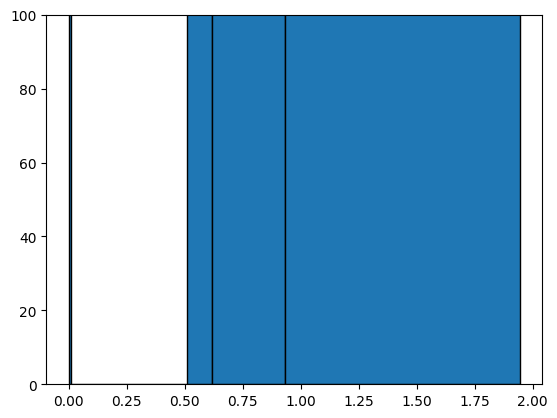

In [10]:
plt.hist (log_delta, bins = delta_bins, edgecolor = 'black')
plt.ylim (0, 100)
plt.show()

In [11]:
mass = data['mass']

u = data['up']
g = data['gp']

col_ug = u - g

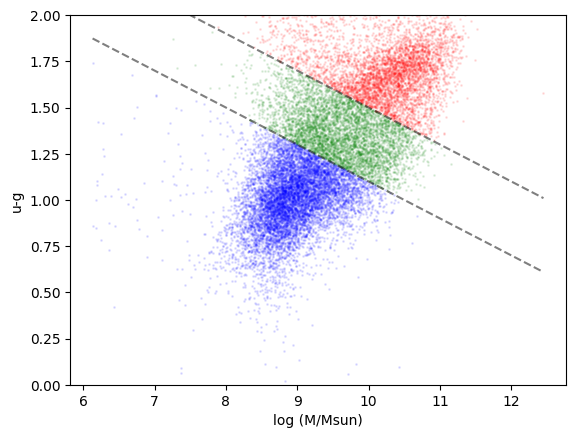

In [12]:
q1 = 3.5
q2 = 3.1
m = -0.2
x = np.linspace (min(mass), max(mass), 10)

def func (x, q, m):
    return q + x*m

blue_cloud = np.where (col_ug < func(mass, q2, m))
red_sequence = np.where (col_ug > func(mass, q1, m))
green_valley = np.where ((col_ug > func(mass, q2, m)) & (col_ug < func(mass, q1, m)))

#plt.scatter (mass, col_ug, s=1, alpha=0.1, c='black')
plt.plot (x, func(x, q1, m), c='black', linestyle = 'dashed', alpha = 0.5)
plt.plot (x, func(x, q2, m), c='black', linestyle = 'dashed', alpha = 0.5)
plt.scatter (mass[blue_cloud], col_ug[blue_cloud], s=1, alpha=0.1, c='blue')
plt.scatter (mass[red_sequence], col_ug[red_sequence], s=1, alpha=0.1, c='red')
plt.scatter (mass[green_valley], col_ug[green_valley], s=1, alpha=0.1, c='green')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

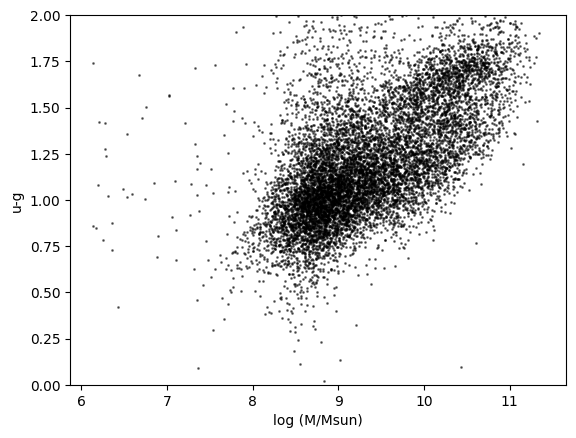

In [13]:
plt.scatter (mass [bin1], col_ug [bin1], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

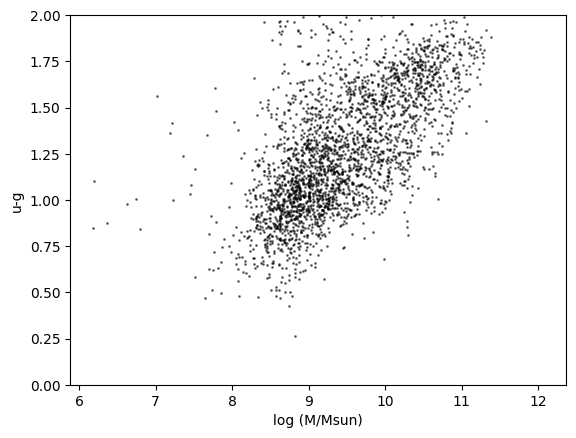

In [14]:
plt.scatter (mass [bin2], col_ug [bin2], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

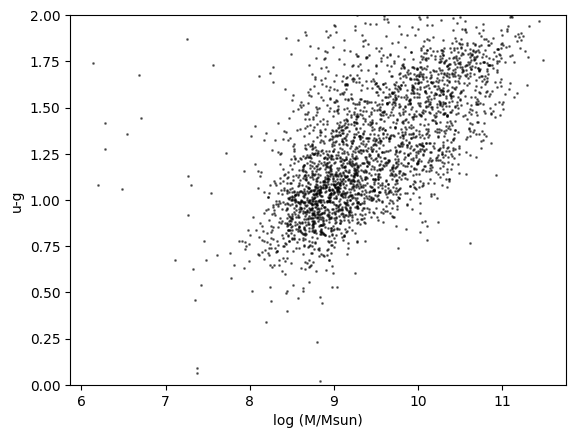

In [15]:
plt.scatter (mass [bin3], col_ug [bin3], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

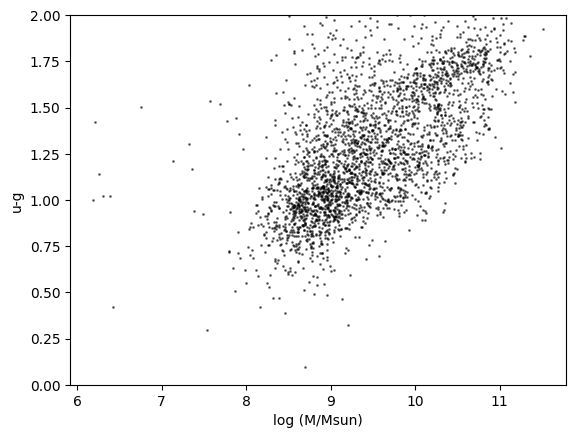

In [16]:
plt.scatter (mass [bin4], col_ug [bin4], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

## Task 3

In [17]:
#FARE ISTOGRAMMA

blue_iso = np.intersect1d (blue_cloud, bin1)
red_iso = np.intersect1d (red_sequence, bin1)
green_iso = np.intersect1d (green_valley, bin1)

print ('ISOLATED GALAXIES')
print (100*len(blue_iso)/len(bin1[0]), 'blue galaxies')
print (100*len(red_iso)/len(bin1[0]), 'red galaxies')
print (100*len(green_iso)/len(bin1[0]), 'green galaxies')
print ('\n')

blue_low = np.intersect1d (blue_cloud, bin2)
red_low = np.intersect1d (red_sequence, bin2)
green_low = np.intersect1d (green_valley, bin2)

print ('LOW DENSITY GALAXIES')
print (100*len(blue_low)/len(bin2[0]), 'blue galaxies')
print (100*len(red_low)/len(bin2[0]), 'red galaxies')
print (100*len(green_low)/len(bin2[0]), 'green galaxies')
print ('\n')

blue_med = np.intersect1d (blue_cloud, bin3)
red_med = np.intersect1d (red_sequence, bin3)
green_med = np.intersect1d (green_valley, bin3)

print ('MEDIUM DENSITY GALAXIES')
print (100*len(blue_med)/len(bin3[0]), 'blue galaxies')
print (100*len(red_med)/len(bin3[0]), 'red galaxies')
print (100*len(green_med)/len(bin3[0]), 'green galaxies')
print ('\n')

blue_high = np.intersect1d (blue_cloud, bin4)
red_high = np.intersect1d (red_sequence, bin4)
green_high = np.intersect1d (green_valley, bin4)

print ('HIGH DENSITY GALAXIES')
print (100*len(blue_high)/len(bin4[0]), 'blue galaxies')
print (100*len(red_high)/len(bin4[0]), 'red galaxies')
print (100*len(green_high)/len(bin4[0]), 'green galaxies')
print ('\n')


ISOLATED GALAXIES
56.158977731842526 blue galaxies
20.52992577280842 red galaxies
23.311096495349055 green galaxies


LOW DENSITY GALAXIES
47.99721351445489 blue galaxies
27.83002438174852 red galaxies
24.172762103796586 green galaxies


MEDIUM DENSITY GALAXIES
48.122866894197955 blue galaxies
26.757679180887372 red galaxies
25.119453924914676 green galaxies


HIGH DENSITY GALAXIES
45.98137288720248 blue galaxies
27.69920662297344 red galaxies
26.319420489824076 green galaxies




# Part 2

In [18]:
spec2 = fits.open('Spec_N4330_region2 (1).fits')
spec2flx = spec2[0].data
spec2err = spec2[1].data
spec2wav = spec2[2].data

print (spec2flx.shape)
print (spec2err.shape)
print (spec2wav.shape)


table = fits.open('Phot_N4330 (1).fits')
tabdata = table[1].data

print (tabdata.columns)

(2400,)
(2400,)
(2400,)
ColDefs(
    name = 'id'; format = 'K'; null = -9223372036854775808
    name = 'z_best'; format = 'D'
    name = 'dl'; format = 'D'
    name = 'f_FUV'; format = 'D'
    name = 'e_FUV'; format = 'D'
    name = 'f_NUV'; format = 'D'
    name = 'e_NUV'; format = 'D'
    name = 'f_U'; format = 'D'
    name = 'e_U'; format = 'D'
    name = 'f_G'; format = 'D'
    name = 'e_G'; format = 'D'
    name = 'f_I'; format = 'D'
    name = 'e_I'; format = 'D'
    name = 'f_Z'; format = 'D'
    name = 'e_Z'; format = 'D'
    name = 'f_IRAC1'; format = 'D'
    name = 'e_IRAC1'; format = 'D'
    name = 'f_IRAC4'; format = 'D'
    name = 'e_IRAC4'; format = 'D'
    name = 'f_PACS100'; format = 'D'
    name = 'e_PACS100'; format = 'D'
)


In [43]:
mean_flux = np.mean(spec2flx)

#Read model
modhdu = fits.open('Models_N4330_region2 (1).fits')
#How many extensions
Next = modhdu[0].header['NEXT']
modwave = modhdu[0].data
chi2 = np.zeros (Next)
consts = np.zeros (Next)
Qtau_vec = np.zeros (Next)
Qage_vec = np.zeros (Next)
for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    Qtau = thishead['TRUNCTAU']
    Qage = thishead['TRUNCAGE']
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
    thishead['MODU'],thishead['MODG'],\
    thishead['MODI'],thishead['MODZ'], \
    thishead['MODIR1'],thishead['MODIR4']))

    mean_mod = np.mean(modspec.flatten())

    const = mean_flux / mean_mod
    consts[ext-1] = const
    modspec2 = modspec * const

    chi2[ext-1] = (np.sum((spec2flx - modspec2)**2 / (spec2err**2))) / len(spec2flx)

    Qtau_vec[ext-1] = Qtau
    Qage_vec[ext-1] = Qage

## Task 1

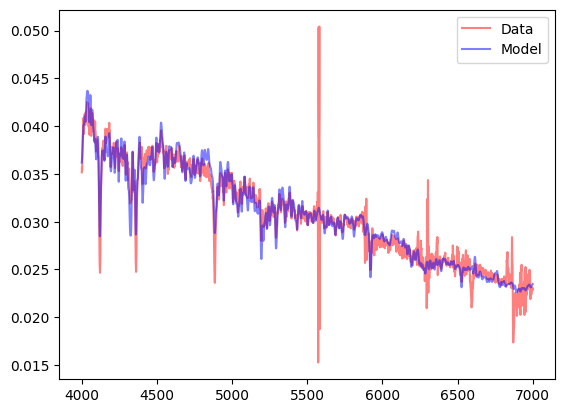

In [36]:
plt.plot (spec2wav, spec2flx, c='red', alpha=0.5, label='Data')
plt.plot (modwave.flatten(), modspec2.flatten(), c='blue', alpha=0.5, label='Model')
plt.legend()
plt.show()

## Task 2

In [62]:
print ('Chi2 vector:',chi2)

best = np.where(chi2 == np.min(chi2))[0][0]

print ('Best model:', best)

Chi2 vector: [ 1.79971359  1.04442209  0.96861967  0.97261589  0.98002428  0.98913853
  1.00844197  1.04147847  1.09203791  1.25143605  1.41424845  7.40129706
  3.21219548  1.72886072  1.21368925  1.04138388  0.97833252  0.99973142
  1.03190454  1.07939342  1.23635326  1.40073448 14.18989008  7.66242488
  4.24237375  2.5245504   1.68891418  1.1125229   0.99218686  1.02089272
  1.06641079  1.22043351  1.38626779 19.46305232 12.42149185  7.87678404
  5.03906381  3.31747648  1.70979155  1.0419724   1.01387019  1.05343536
  1.20367469  1.37068153 23.28963782 16.47059767 11.54189281  8.05719689
  5.64568375  2.92080005  1.27283988  1.03974598  1.04535363  1.18631145
  1.35390926 25.93427271 19.54634547 14.63415195 10.90669224  8.11818268
  4.5644337   1.80578637  1.17183502  1.06642735  1.1695662   1.3354921
 28.03800735 22.10086026 17.33576893 13.54169248 10.55010488  6.41331224
  2.61313724  1.45460237  1.14912608  1.15778394  1.31694011 29.72382667
 24.21771049 19.66154422 15.90752843 12

In [38]:
best_ext = modhdu[best + 1]
best_Qage = best_ext.header["TRUNCAGE"]
best_Qtau = best_ext.header["TRUNCTAU"]

print ('Best Q age', best_Qage, 'Myr')
print ('Best Q tau', best_Qtau)


Best Q age 100 Myr
Best Q tau 20


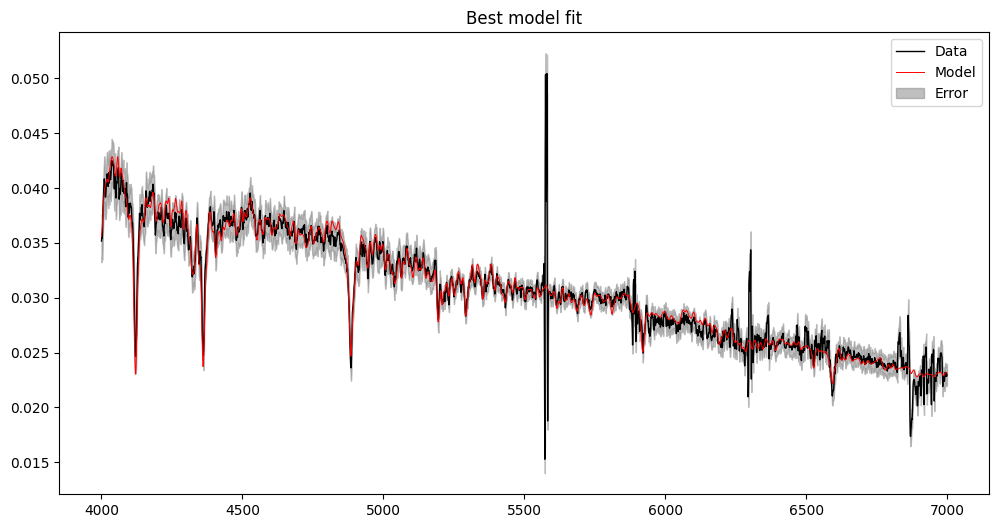

In [39]:
best_spec = best_ext.data
plt.figure(figsize=(12,6))
plt.plot (spec2wav, spec2flx, c='black', alpha=1, label='Data', linewidth=1)
plt.plot (modwave.flatten(), consts[best]*best_spec.flatten(), c='red', alpha=1, label='Model', linewidth=0.7)
#plt.plot (spec2wav, spec2flx+spec2err, c='gray', alpha=1, linewidth=0.7)
#plt.plot (spec2wav, spec2flx-spec2err, c='gray', alpha=1, linewidth=0.7)
plt.fill_between (spec2wav, spec2flx-spec2err, spec2flx+spec2err, color='gray', alpha=0.5, label='Error')
plt.title ('Best model fit')
plt.legend()
plt.show()

In [40]:
print (f" Reduced chi2: {chi2.min():.3f}") #/len(spec2flx)

 Reduced chi2: 0.969


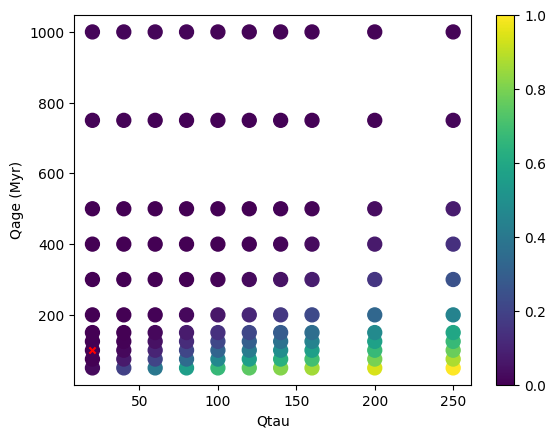

In [70]:
plt.scatter (Qtau_vec, Qage_vec, c=chi2, s=100)
plt.scatter (best_Qtau, best_Qage, c='red', s=20, marker='x')
plt.colorbar ()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel ('Qtau')
plt.ylabel ('Qage (Myr)')
plt.show()

# Task 3

In [25]:
print (tabdata.columns)

ColDefs(
    name = 'id'; format = 'K'; null = -9223372036854775808
    name = 'z_best'; format = 'D'
    name = 'dl'; format = 'D'
    name = 'f_FUV'; format = 'D'
    name = 'e_FUV'; format = 'D'
    name = 'f_NUV'; format = 'D'
    name = 'e_NUV'; format = 'D'
    name = 'f_U'; format = 'D'
    name = 'e_U'; format = 'D'
    name = 'f_G'; format = 'D'
    name = 'e_G'; format = 'D'
    name = 'f_I'; format = 'D'
    name = 'e_I'; format = 'D'
    name = 'f_Z'; format = 'D'
    name = 'e_Z'; format = 'D'
    name = 'f_IRAC1'; format = 'D'
    name = 'e_IRAC1'; format = 'D'
    name = 'f_IRAC4'; format = 'D'
    name = 'e_IRAC4'; format = 'D'
    name = 'f_PACS100'; format = 'D'
    name = 'e_PACS100'; format = 'D'
)


In [26]:
phot_tab2 = tabdata [1]
print (phot_tab2)

phot2 = np.zeros (8)
phot2_err = np.zeros (8)

for i in range (len(phot2)):
    phot2[i] = phot_tab2[3+(2*i)]
    phot2_err[i] = phot_tab2[4+(2*i)]
print (phot2)
print (phot2_err)

(2, 0.0046705, 16.5, 0.107, 0.005, 0.171, 0.008, 0.686, 0.045, 1.539, 0.05, 2.591, 0.09, 3.027, 0.11, 1.477, 0.049, 0.598, 0.08, 0.1, 12.19)
[0.107 0.171 0.686 1.539 2.591 3.027 1.477 0.598]
[0.005 0.008 0.045 0.05  0.09  0.11  0.049 0.08 ]


In [72]:
chi2_phot = np.zeros(Next)
Qtau_vec_phot = np.zeros (Next)
Qage_vec_phot = np.zeros (Next)

for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
    thishead['MODU'],thishead['MODG'],\
    thishead['MODI'],thishead['MODZ'], \
    thishead['MODIR1'],thishead['MODIR4']))

    chi2_phot[ext-1] = np.sum((photarr - phot2)**2 / (phot2_err**2))
    Qtau_vec_phot[ext-1] = thishead['TRUNCTAU']
    Qage_vec_phot[ext-1] = thishead['TRUNCAGE']
    

In [33]:
print (chi2_phot/8)

ind_min = np.argmin(chi2_phot/8)

print (f'Reduced chi2: {(chi2_phot/8)[ind_min]:.2f}')

print (ind_min)

[3.11644178e+02 5.77425029e+01 5.03898502e+00 2.41144025e+00
 1.27351606e+01 3.89755046e+01 8.15796208e+01 1.08219504e+02
 1.26054241e+02 1.55041797e+02 1.75432108e+02 9.85452307e+02
 3.40070288e+02 1.01911024e+02 2.10762416e+01 1.54786846e+00
 1.76096080e+01 6.95782590e+01 1.01960465e+02 1.22166147e+02
 1.52971575e+02 1.73867762e+02 1.70728283e+03 7.95431309e+02
 3.43669999e+02 1.31425812e+02 3.95945738e+01 2.10348068e+00
 4.99838046e+01 9.14308663e+01 1.16416914e+02 1.50625541e+02
 1.72224874e+02 2.28130931e+03 1.27545926e+03 6.78509617e+02
 3.38712017e+02 1.53676091e+02 1.68922719e+01 2.63274146e+01
 7.52033685e+01 1.07381040e+02 1.47707597e+02 1.70448040e+02
 2.71847511e+03 1.70384796e+03 1.03019948e+03 5.98268825e+02
 3.29699431e+02 7.70167178e+01 7.94125753e+00 5.38018968e+01
 9.37243258e+01 1.43780579e+02 1.68460455e+02 3.03286523e+03
 2.04574275e+03 1.34310040e+03 8.57604194e+02 5.29825013e+02
 1.75429015e+02 5.43773390e+00 3.08128029e+01 7.40395323e+01
 1.37051391e+02 1.657402

150 40


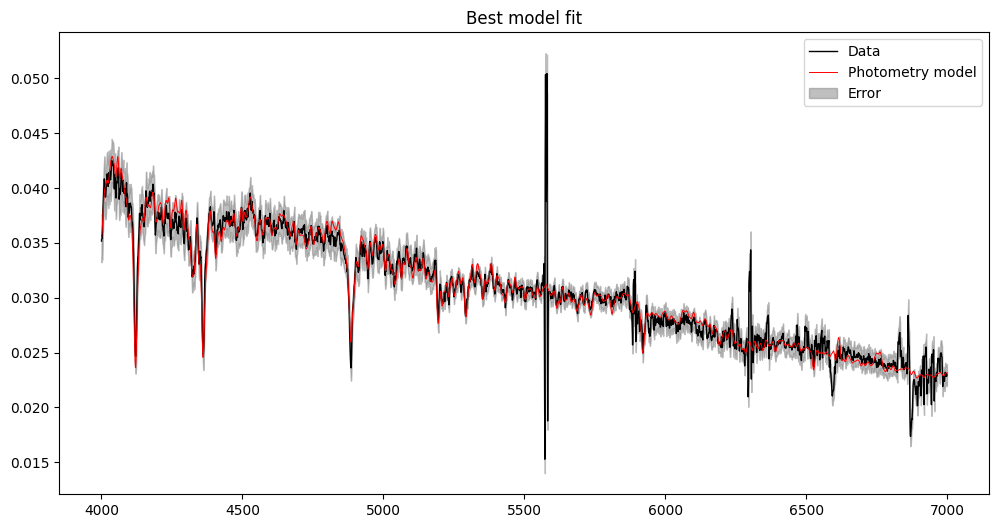

In [29]:
best_ext_phot = modhdu[ind_min+1]

Qage_phot = best_ext_phot.header['TRUNCAGE']
Qtau_phot = best_ext_phot.header['TRUNCTAU']

print (Qage_phot, Qtau_phot)

best_spec_phot = best_ext_phot.data
plt.figure(figsize=(12,6))
plt.plot (spec2wav, spec2flx, c='black', alpha=1, label='Data', linewidth=1)
plt.plot (modwave.flatten(), consts[ind_min]*best_spec_phot.flatten(), c='red', alpha=1, label='Photometry model', linewidth=0.7)
#plt.plot (spec2wav, spec2flx+spec2err, c='gray', alpha=1, linewidth=0.7)
#plt.plot (spec2wav, spec2flx-spec2err, c='gray', alpha=1, linewidth=0.7)
plt.fill_between (spec2wav, spec2flx-spec2err, spec2flx+spec2err, color='gray', alpha=0.5, label='Error')
plt.title ('Best model fit')
plt.legend()
plt.show()

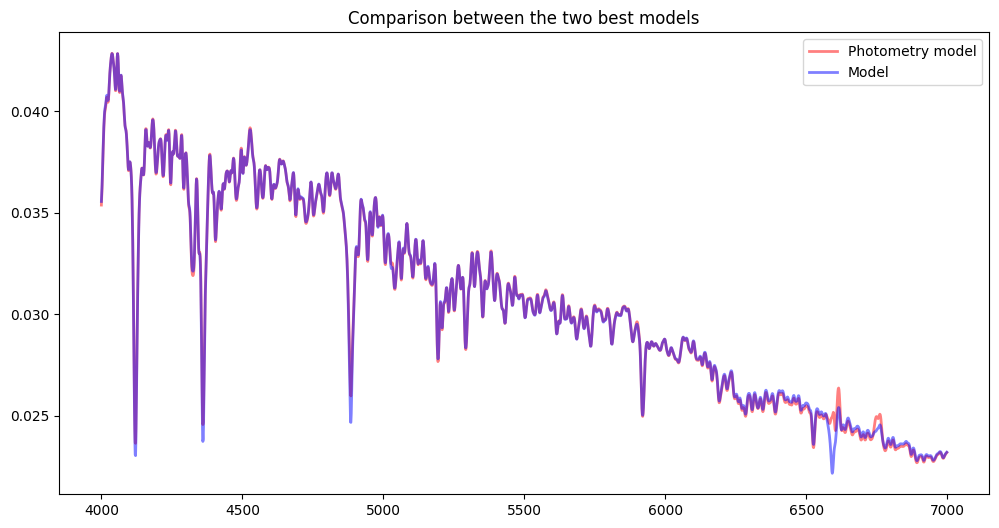

In [30]:
plt.figure(figsize=(12,6))
plt.plot (modwave.flatten(), consts[ind_min]*best_spec_phot.flatten(), c='red', alpha=0.5, label='Photometry model', linewidth=2)
plt.plot (modwave.flatten(), consts[best]*best_spec.flatten(), c='blue', alpha=0.5, label='Model', linewidth=2)
plt.title ('Comparison between the two best models')
plt.legend()
plt.show()

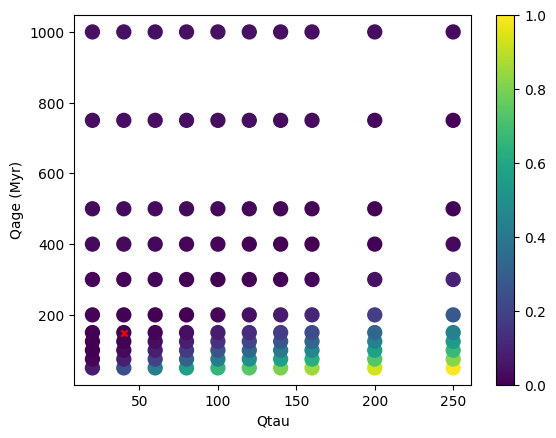

In [74]:
plt.scatter (Qtau_vec_phot, Qage_vec_phot, c=chi2_phot, s=100)
plt.scatter (Qtau_phot, Qage_phot, c='red', s=20, marker='x')
plt.colorbar ()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel ('Qtau')
plt.ylabel ('Qage (Myr)')
plt.show()